# Greenland's ice sheet remote sensing datasets

Packages and plotting methods:
1. xarray
2. rioxarray
3. netCDF
4. rasterio
5. GDAL 

plt plot

## microwave-rs

#### imports

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

#### load data

In [1]:
microwave_path = '../Data/microwave-rs/CumJour-North-ssmi-1979-2022-H19.nc'

In [3]:
nc_fid = nc.Dataset(microwave_path, 'r')

# dimensions(sizes): y(109), x(60), time(15663), nv(4)
# variables(dimensions): 
# float32 lat(y, x), 
# float32 lon(y, x), 
# int64 time(time), 
# float32 bounds_lat(y, x, nv), 
# float32 bounds_lon(y, x, nv), 
# float64 x(x), 
# float64 y(y), 
# int64 spatial_ref(), 
# int8 melt(time, y, x)

In [6]:
# nv - maximum number of cell vertices?? (4 corners of pixel)
for dim in nc_fid.dimensions.values():
    print(dim)


<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 109
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 60
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 15663
<class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 4


In [7]:
for var in nc_fid.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(y, x)
    _FillValue: nan
    bounds: bounds_lat
    long_name: latitude
    units: degrees_north
    grid_mapping: spatial_ref
unlimited dimensions: 
current shape = (109, 60)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 lon(y, x)
    _FillValue: nan
    bounds: bounds_lon
    long_name: longitude
    units: degrees_east
    grid_mapping: spatial_ref
unlimited dimensions: 
current shape = (109, 60)
filling on
<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    units: days since 1979-11-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (15663,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float32 bounds_lat(y, x, nv)
    _FillValue: nan
    grid_mapping: spatial_ref
unlimited dimensions: 
current shape = (109, 60, 4)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 bounds_lon(y, x, nv)
    _FillValue: nan
    grid_mapping: spatial_re

#### variables

In [176]:
lats = nc_fid.variables['lat']#[:]
lons = nc_fid.variables['lon']#[:]
melt = nc_fid.variables['melt']#[:]
time = nc_fid.variables['time']
bounds_lat = nc_fid.variables['bounds_lat']
bounds_lon = nc_fid.variables['bounds_lon']
xx = nc_fid.variables['x']
yy = nc_fid.variables['y']
spatial_ref = nc_fid.variables['spatial_ref']

#### plot

/tmp/ipykernel_396/351203066.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=axs[0].pcolormesh(lons, lats, np.ma.getdata(melt[1]), cmap='Greys') # 'viridis'


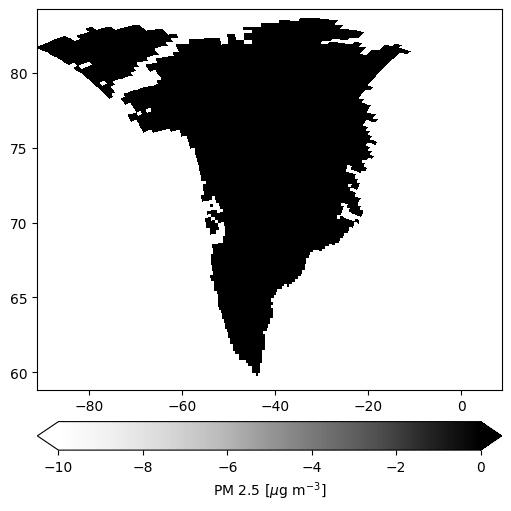

In [175]:
fig, axs = plt.subplots(figsize=(5, 5),  nrows=2, ncols=1,gridspec_kw={'height_ratios': [20,1.5]},constrained_layout=True) #
#pcm=axs[0].pcolormesh(bounds_lat, bounds_lat, np.ma.getdata(melt[1]),cmap='viridis')
pcm=axs[0].pcolormesh(lons, lats, np.ma.getdata(melt[1]), cmap='Greys') # 'viridis'
cbar=fig.colorbar(pcm,cax=axs[1], extend='both', orientation='horizontal')
cbar.set_label('PM 2.5 [$\mu$g m$^{-3}]$')

## optical data

# optical data with:
# rasetrio
# other packages

#### imports

In [30]:
from PIL import Image
import rasterio
import rasterio.features
import rasterio.warp

import rioxarray 

#### load data

In [5]:
optical_path ='../Data/optical-rs/2019-06-08_grain_diameter.tif'

In [183]:
im = Image.open(optical_path) # # im.show()
 #xarr ay loaddataset #...toDataframe9)

In [ ]:
with rasterio.open(optical_path) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        #print(geom)

In [ ]:
# metadata
img = Image.open(optical_path)
meta_dict = {TAGS[key] : img.tag[key] for key in img.tag_v2}

meta_dict

In [54]:
test =rioxarray.open_rasterio(path3)

In [69]:
test
#test.to_dataframe()

<xarray.DataArray (band: 1, y: 2687, x: 1487)>
[3995569 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -6.365e+05 -6.355e+05 ... 8.485e+05 8.495e+05
  * y            (y) float64 -6.625e+05 -6.635e+05 ... -3.348e+06 -3.348e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [82]:
band_id = 1  

raster = rasterio.open(path3) #,masked=True)
band_arr = raster.read(band_id)  # band_arr is a numpy array of shape (raster.width, raster.height)

# px_vals = []

# for x in range(band_arr.shape[0]):
#     for y in range(band_arr.shape[1]):
#         px_vals.append({'x': x, 'y': y, 'value': band_arr[x, y]})

band_arr
np.unique(band_arr)

#### plot

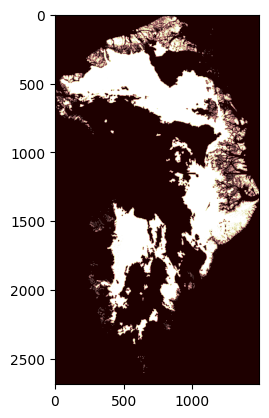

In [178]:
#import rasterio
#from matplotlib import pyplot
src = rasterio.open(path3)
plt.imshow(src.read(1), cmap='pink')
#<matplotlib.image.AxesImage object at 0x...>
plt.show()

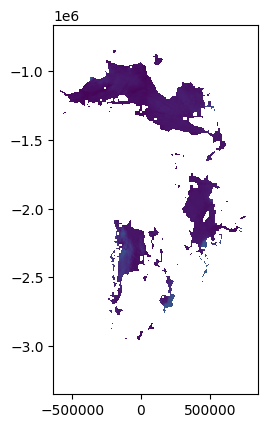

<AxesSubplot: >

In [40]:
from rasterio.plot import show
show(src)

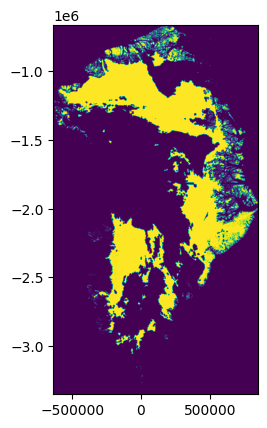

<AxesSubplot: >

In [41]:
show(src.read(), transform=src.transform)

## Overlay

1. overlay
2. analyse and look at thresholds -> compare, do boundaries based on melting (0.64) threshold
3. boudaries for plot? # https://rasterio.readthedocs.io/en/latest/topics/plotting.html